# Homework 2 - Olivier Gilbert

## 1.

### a)
### $$\tau(\lambda) = \tau_0 e^{-\frac{(\lambda-\lambda_0)^2}{2\sigma^2}}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Define gaussian spectral line
def tau_lambda(wavelenghts:np.ndarray, lambda_0:float, tau_0:float, sigma:float) -> np.ndarray:
    """Returns an array of tau as a function of wavelengths"""
    return (
        tau_0 * np.exp(-np.power((wavelenghts-lambda_0) / sigma, 2.0) / 2)
    )

### b)

In [16]:
def intensity(tau_lambda:np.ndarray, I_0:float, factor:float) -> np.ndarray:
    """Assume S is a multiplication of I_0. Assume I_0 is constant over the line width."""
    S = I_0*factor
    return I_0*np.exp(-tau_lambda)+S*(1-np.exp(-tau_lambda))

def intensity_v2(tau_lambda:np.ndarray, I_0:np.ndarray, S:np.ndarray) -> np.ndarray:
    """More general definition of I_0 and S."""
    return I_0*np.exp(-tau_lambda)+S

### c)

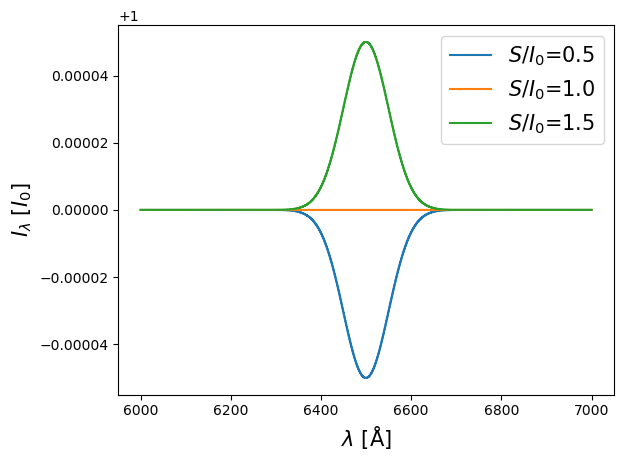

In [55]:
# Calculate spectrum
wavs = np.linspace(6000,7000,1000) # in Angstroms
lambda_0 = np.mean(wavs)
sigma = (np.max(wavs)-np.min(wavs))/20
x = (wavs-lambda_0)/sigma
S_factors = [0.5,1,1.5]
for S_factor in S_factors:
    I_lambda = intensity(tau_lambda=tau_lambda(wavs, lambda_0, 1E-4, sigma),
            I_0=1,
            factor=S_factor
            )
    plt.step(wavs, I_lambda, label=f"$S/I_0$={S_factor:.1f}")
plt.legend(fontsize=15)
plt.xlabel(r"$\lambda$ [$\mathrm{\AA}$]", fontsize=15)
plt.ylabel(r"$I_\lambda$ [$I_0$]", fontsize=15)
plt.show()

#### i) For an emission line to exist, the ratio $\frac{S}{I_0}$ needs to be greater than 1.
#### ii) For an absorption line to exist, the ratio $\frac{S}{I_0}$ needs to be lesser than 1.
#### iii) For no line to exist, the ratio $\frac{S}{I_0}$ needs to be equal to 1.

### d)

We can calculate the conditions needed for an emission line starting from the radiative transfer equation.
$$I(\lambda) = I_0 e^{-\tau_\lambda}+S(1-e^{-\tau_\lambda})$$

For an emission line, we need $I(\lambda_0)>I_0$:

$$I(\lambda_0) > I_0$$
$$I_0 e^{-\tau_0}+S(1-e^{-\tau_0}) > I_0$$
$$e^{-\tau_0}+\frac{S}{I_0}(1-e^{-\tau_0}) > 1$$
$$\frac{S}{I_0}(1-e^{-\tau_0})+e^{-\tau_0}-1 > 0$$
$$\left(\frac{S}{I_0}-1\right)(1-e^{-\tau_0})> 0$$

Since $0<\tau_0\ll 1$, we know the term $(1-e^{-\tau_0})$ is necessarily positive. This means we need $\frac{S}{I_0}-1>0$, so $\frac{S}{I_0}>1$, just like we concluded in c).

For an absorption line, we need $I(\lambda_0)<I_0$:

$$I(\lambda_0) < I_0$$
$$I_0 e^{-\tau_0}+S(1-e^{-\tau_0}) < I_0$$
$$e^{-\tau_0}+\frac{S}{I_0}(1-e^{-\tau_0}) < 1$$
$$\frac{S}{I_0}(1-e^{-\tau_0})+e^{-\tau_0}-1 < 0$$
$$\left(\frac{S}{I_0}-1\right)(1-e^{-\tau_0})< 0$$

Since $0<\tau_0\ll 1$, we know the term $(1-e^{-\tau_0})$ is necessarily positive. This means we need $\frac{S}{I_0}-1<0$, so $\frac{S}{I_0}<1$, just like we concluded in c).

For an absorption line, we need $I(\lambda_0)=I_0$:

$$I(\lambda_0) = I_0$$
$$I_0 e^{-\tau_0}+S(1-e^{-\tau_0}) = I_0$$
$$e^{-\tau_0}+\frac{S}{I_0}(1-e^{-\tau_0}) = 1$$
$$\frac{S}{I_0}(1-e^{-\tau_0})+e^{-\tau_0}-1 = 0$$
$$\left(\frac{S}{I_0}-1\right)(1-e^{-\tau_0})= 0$$

Since $0<\tau_0\ll 1$, we know the term $(1-e^{-\tau_0})$ is necessarily positive. This means we need $\frac{S}{I_0}-1=0$, so $\frac{S}{I_0}=1$, just like we concluded in c).

### e)